In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
x = np.linspace(-4, 4, 100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + np.random.normal(0, 2, 100)

In [3]:
def polynomialRegression(degree):
    return Pipeline([('poly', PolynomialFeatures(degree)), 
                     ('stand', StandardScaler()),
                     ('linear', LinearRegression())])

### 线性回归

In [4]:
linear = LinearRegression()
linear.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
mean_squared_error(y, linear.predict(X))

9.898315214765779

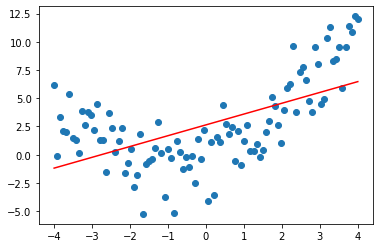

In [6]:
plt.scatter(x, y)
plt.plot(x, linear.predict(X), color="r")
plt.show()

### degree=2

In [7]:
poly1 = polynomialRegression(2)
poly1.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('stand',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [8]:
mean_squared_error(y, poly1.predict(X))

3.920796879654116

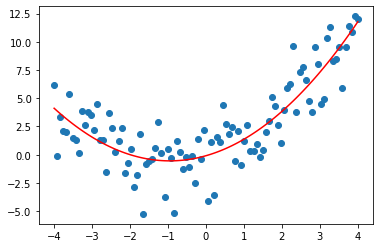

In [9]:
plt.scatter(x, y)
plt.plot(x, poly1.predict(X), color="r")
plt.show()

### degree = 10

In [10]:
poly10 = polynomialRegression(10)
poly10.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('stand',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [11]:
mean_squared_error(y, poly10.predict(X))

3.6274001160067315

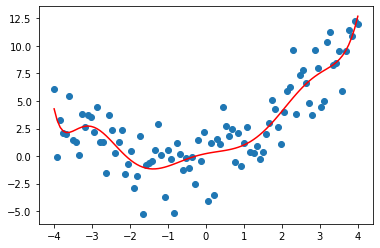

In [12]:
plt.scatter(x, y)
plt.plot(x, poly10.predict(X), color="r")
plt.show()

### degree = 50

In [13]:
poly50 = polynomialRegression(50)
poly50.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=50, include_bias=True,
                                    interaction_only=False, order='C')),
                ('stand',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [14]:
mean_squared_error(y, poly50.predict(X))

1.967860084741086

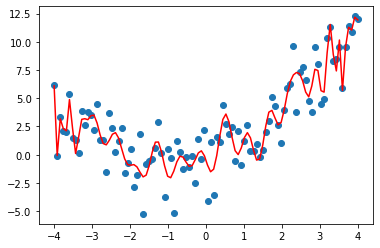

In [15]:
plt.scatter(x, y)
plt.plot(x, poly50.predict(X), color="r")
plt.show()

### MSE计算拟合程度

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
## Underfitting
linear.fit(X_train, y_train)
mean_squared_error(y_test, linear.predict(X_test))

10.841014801114396

In [18]:
poly1.fit(X_train, y_train)
mean_squared_error(y_test, poly1.predict(X_test))

4.286037084958062

In [19]:
poly10.fit(X_train, y_train)
mean_squared_error(y_test, poly10.predict(X_test))

4.71845367955653

In [20]:
## Overfitting
poly50.fit(X_train, y_train)
mean_squared_error(y_test, poly50.predict(X_test))

321807728911.30524